In [32]:
import colour
import matplotlib.pyplot as plt
import numpy as np

(471, 3) (471,)


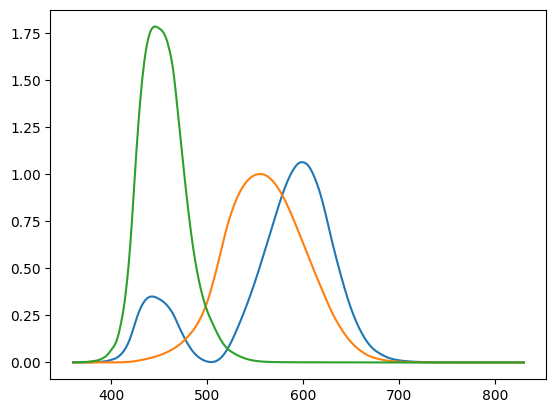

In [33]:
xyz_cmfs = colour.colorimetry.MSDS_CMFS_STANDARD_OBSERVER["CIE 1931 2 Degree Standard Observer"]

print(xyz_cmfs.values.shape, xyz_cmfs.wavelengths.shape)
plt.plot(xyz_cmfs.wavelengths, xyz_cmfs.values)

In [34]:
A = xyz_cmfs.values # Color matching functions
E = A @ np.linalg.inv(A.T @ A) # represents the primaries
R = E @ A.T # Maps from SPD to fundamental.

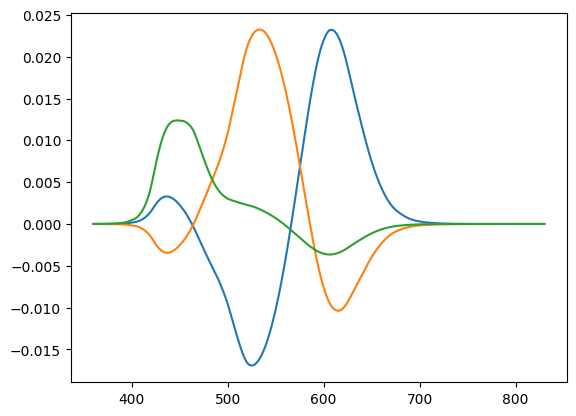

In [35]:
plt.plot(xyz_cmfs.wavelengths, E)

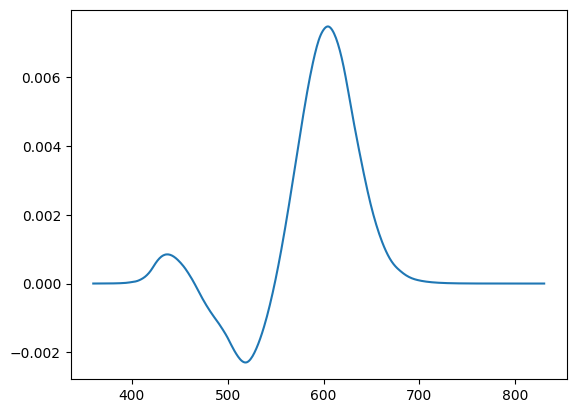

In [36]:
spd = E @ np.array([0.41239, 0.21264, 0.01933]) # rec709 red
plt.plot(xyz_cmfs.wavelengths, spd)

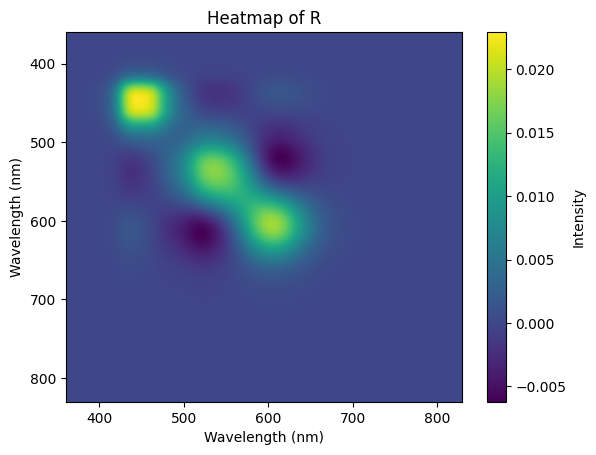

In [37]:
plt.imshow(R, aspect='auto', cmap='viridis', extent=[xyz_cmfs.wavelengths[0], xyz_cmfs.wavelengths[-1], xyz_cmfs.wavelengths[-1], xyz_cmfs.wavelengths[0]])
plt.colorbar(label='Intensity')
plt.title('Heatmap of R')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Wavelength (nm)')
plt.show()

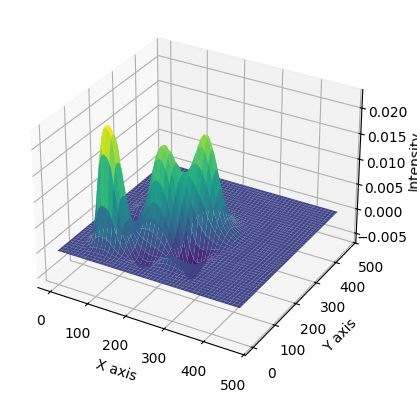

In [38]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(np.arange(R.shape[1]), np.arange(R.shape[0]))
ax.plot_surface(X, Y, R, cmap='viridis')
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Intensity')
plt.show()